In [23]:
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
import metpy
from netCDF4 import Dataset

from metpy.units import units
import metpy.calc as mpcalc
import scipy.ndimage as ndimage

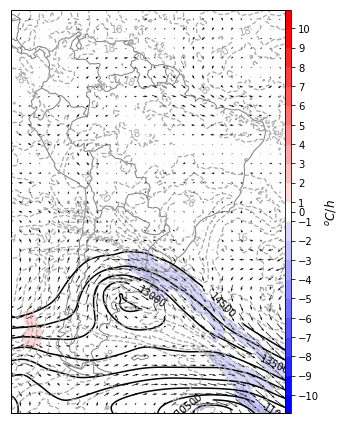

In [21]:
extent_sa = [-85., -30., -60., 15.] #-- [min lon, min lat, max lon, max lat]
fig_type = 'SA'

datacrs = ccrs.PlateCarree()
plotcrs = ccrs.PlateCarree(central_longitude=-50)

fig = plt.figure(figsize=(5,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, .02], left=.07, right=.9, hspace=0.01, 
                       wspace=0.01)

ax = plt.subplot(gs[0], projection=plotcrs)
ax.set_extent(extent_sa)
fig.set_facecolor('w')
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')

clev850 = np.arange(10000, 15000, 500)
cs = ax.contour(lon_2d, lat_2d, z_850, clev850, colors='black', linewidths=1.5,
                linestyles='solid', transform=datacrs)
plt.clabel(cs, fontsize=10, inline=1, inline_spacing=10, fmt='%i',
           rightside_up=True, use_clabeltext=True)

clevtemp850 = np.arange(-20, 30, 2)
cs2 = ax.contour(lon_2d, lat_2d, t[12][5].to(units('degC')), clevtemp850,
                 colors='darkgrey', linewidths=1.25, linestyles='dashed', transform=datacrs)
plt.clabel(cs2, fontsize=10, inline=1, inline_spacing=10, fmt='%i',
           rightside_up=True, use_clabeltext=True)

cint = np.arange(-10, 11)
cf = ax.contourf(lon_2d[:][1:-1], lat_2d[:][1:-1], adv_t_850.to(units('delta_degC/hour')), cint[cint != 0],
                 extend='both', cmap='bwr', transform=datacrs)
cax = plt.subplot(gs[1])
cb = plt.colorbar(cf, cax=cax, orientation='vertical', extendrect=True, ticks=cint)
cb.set_label(r'Advection ($^{o}C/h$)', size='large')

ax.quiver(lon_2d, lat_2d, u[12][5].magnitude, v[12][5].magnitude,
          regrid_shape=30, pivot='middle', transform=datacrs)

gs.tight_layout(fig)

In [18]:
def plot_map(extent=[-85., -30., -60., 15.]):
    """
    
    """
    
    # Set the projection information
    proj = ccrs.LambertConformal(central_longitude=-57.5, central_latitude=-12.5, standard_parallels=[53])
    # Create a figure with an axes object on which we will plot
    # Pass the projection to that axes
    fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
    
    # Zoom in
    ax.set_extent(extent)
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('100m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    # Add lat/lon gridlines every 20° to the map
    ax.gridlines(xlocs=np.arange(0, 361, 20), ylocs=np.arange(-80, 90, 20)) 
    
    return fig, ax

In [24]:
def plot_jets(data, **kwargs):
    """
    
    """
    
    lat = data['latitude']
    lon = data['longitude']
    
    wind = mpcalc.wind_speed(data['u'].sel(level=250), data['v'].sel(level=250))
    z = data['z'].sel(level=1000)
    thick = data['z'].sel(level=500) - data['z'].sel(level=1000)
    
    fig, ax = plot_map()
    
    z_cont = ax.contour(lon, lat, z, colors='k', linewidths=1, zorder=3, transform=ccrs.PlateCarree())
    plt.clabel(z_cont, inline=True, fmt='%1i', fontsize=10)
    
    th_cont = ax.contour(lon, lat, thick, colors='b', linewidths=1, linestyles='dashed', zorder=2, transform=ccrs.PlateCarree())
    plt.clabel(th_cont, inline=True, fmt='%1i', fontsize=10)
    
    ax.contourf(lon, lat, wind, zorder=1, transform=ccrs.PlateCarree())

In [19]:
filename = "../Data/REANALYSIS/ERA5/era5_20170314.nc"

extent_sa = [-85., -30., -60., 15.] #-- [min lon, min lat, max lon, max lat]
fig_type = 'SA'

In [15]:
ds = xr.open_dataset(filename)
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 10, longitude: 1440, time: 24)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 10 100 250 500 700 850 925 950 975 1000
  * time       (time) datetime64[ns] 2017-03-14 ... 2017-03-14T23:00:00
Data variables:
    pv         (time, level, latitude, longitude) float32 ...
    crwc       (time, level, latitude, longitude) float32 ...
    cswc       (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
    d          (time, level, latitude, longitude) float32 ...
    u          (time, level, l

In [22]:
ds.data_vars.variables

Frozen(OrderedDict([('pv', <xarray.Variable (time: 24, level: 10, latitude: 721, longitude: 1440)>
[249177600 values with dtype=float32]
Attributes:
    units:      K m**2 kg**-1 s**-1
    long_name:  Potential vorticity), ('crwc', <xarray.Variable (time: 24, level: 10, latitude: 721, longitude: 1440)>
[249177600 values with dtype=float32]
Attributes:
    units:      kg kg**-1
    long_name:  Specific rain water content), ('cswc', <xarray.Variable (time: 24, level: 10, latitude: 721, longitude: 1440)>
[249177600 values with dtype=float32]
Attributes:
    units:      kg kg**-1
    long_name:  Specific snow water content), ('z', <xarray.Variable (time: 24, level: 10, latitude: 721, longitude: 1440)>
[249177600 values with dtype=float32]
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential), ('t', <xarray.Variable (time: 24, level: 10, latitude: 721, longitude: 1440)>
[249177600 values with dtype=float32]
Attributes:
    units:      

In [25]:
for i in (7, 13):
    sub_ds = ds.isel(time=i)
    
    plot_jets(sub_ds, extent=extent_sa)
    
    

/home/camila/anaconda3/envs/meteo_py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/camila/anaconda3/envs/meteo_py3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/100m/physical/ne_100m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7693b692f0> (for post_execute):


HTTPError: HTTP Error 404: Not Found

HTTPError: HTTP Error 404: Not Found

<Figure size 432x288 with 1 Axes>

HTTPError: HTTP Error 404: Not Found

<Figure size 432x288 with 1 Axes>

In [12]:
t = ds.variables['t'][:].squeeze() * units.kelvin
u = ds.variables['u'][:].squeeze() * units('m/s')
v = ds.variables['v'][:].squeeze() * units('m/s')
z = ds.variables['z'][:].squeeze() * units.meter
lat = ds.variables['latitude'][:].squeeze() #* units.degree
lon = (ds.variables['longitude'][:].squeeze() - 180) #* units.degree
time = ds.variables['time'][:].squeeze()

lon_2d, lat_2d = np.meshgrid(lon, lat)

MemoryError: 

In [11]:
t

<xarray.Variable (time: 24, level: 10, latitude: 721, longitude: 1440)>
array([[[[226.55928, ..., 226.55928],
         ...,
         [223.61221, ..., 223.61221]],

        ...,

        [[248.13899, ..., 248.13899],
         ...,
         [245.01543, ..., 245.01543]]],


       ...,


       [[[226.42383, ..., 226.42383],
         ...,
         [223.7456 , ..., 223.7456 ]],

        ...,

        [[247.35298, ..., 247.35298],
         ...,
         [243.33461, ..., 243.33461]]]], dtype=float32)

In [6]:
#-- Calculating fields
dx, dy = mpcalc.lat_lon_grid_deltas(lon, lat)
dy *= -1

adv_t_850 = mpcalc.advection(t[12][5], [u[12][5], v[12][5]], (dx, dy), dim_order='yx')
adv_t_850 = adv_t_850[:][1:-1]
z_850 = ndimage.gaussian_filter(z[12][5], sigma=3, order=0) * units.meter
adv_t_850 = ndimage.gaussian_filter(adv_t_850, sigma=3, order=0) * units('K/sec')

TypeError: invalid indexer array, does not have integer dtype: array(None, dtype=object)

In [5]:
ds = Dataset("../Data/REANALYSIS/ERA5/era5_20170314.nc")
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2018-08-01 10:58:18 GMT by grib_to_netcdf-2.8.0: grib_to_netcdf /data/data05/scratch/12/d4/_mars-atls18-a82bacafb5c306db76464bc7e824bb75-dtWMJ7.grib -o /data/data03/scratch/5b/e4/_grib2netcdf-atls19-98f536083ae965b31b0d04811be6f4c6-r0HjMW.nc -utime
    dimensions(sizes): longitude(1440), latitude(721), level(10), time(24)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 level(level), int32 time(time), int16 pv(time,level,latitude,longitude), int16 crwc(time,level,latitude,longitude), int16 cswc(time,level,latitude,longitude), int16 z(time,level,latitude,longitude), int16 t(time,level,latitude,longitude), int16 q(time,level,latitude,longitude), int16 w(time,level,latitude,longitude), int16 vo(time,level,latitude,longitude), int16 d(time,level,latitude,longitude), int16 u(time,level,latitude,longitude), int16 